In [24]:
from utils import get_data
import pandas as pd
import plotly.express as px

In [2]:
url = "https://s3.amazonaws.com/tomslee-airbnb-data-2/sao_paulo.zip"
csv_path = get_data(url)

Saved as /home/random/Downloads/s3_files/sao_paulo/tomslee_airbnb_sao_paulo_1418_2017-07-01.csv


In [3]:
df = pd.read_csv(csv_path)
print(df.shape)
print(list(df.columns))

# colunas completamente nulas: minstay, country e bathrooms
df.drop(['minstay', 'country', 'bathrooms'], axis=1, inplace=True)

(11118, 21)
['room_id', 'survey_id', 'host_id', 'room_type', 'country', 'city', 'borough', 'neighborhood', 'reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'bathrooms', 'price', 'minstay', 'name', 'property_type', 'last_modified', 'latitude', 'longitude', 'location']


In [37]:
df.head()

,room_id,survey_id,host_id,room_type,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,property_type,last_modified,latitude,longitude,location,total_reviews_by_neighborhood,weighted_satisfaction
0,3732200,1418,11284828,Shared room,Sao Paulo,SAO PAULO,Mooca,0,0.0,5,1.0,47.0,"Cultural mixing, students travelers",House,2017-07-02 06:21:30.822562,-23.560867,-46.605319,0101000020E6100000DF52CE177B4D47C0D767CEFA948F...,150,0.0
1,2247926,1418,11480197,Shared room,Sao Paulo,SAO PAULO,Pinheiros,0,0.0,16,1.0,21.0,CityLights Hostel - The Best Hostel,Bed & Breakfast,2017-07-02 06:21:06.042159,-23.562833,-46.694440,0101000020E61000006284F068E35847C00D1CD0D21590...,5420,0.0
2,2674673,1418,13694017,Shared room,Sao Paulo,SAO PAULO,Itaquera,0,0.0,8,1.0,311.0,Sobrado Itaquera SP,House,2017-07-02 06:20:48.882592,-23.543185,-46.457264,0101000020E6100000AFD172A0873A47C082AD122C0E8B...,1,0.0
3,2996011,1418,15272568,Shared room,Sao Paulo,SAO PAULO,Penha,0,0.0,5,1.0,389.0,"5,2 km do estádio de Itaquera alugo",Apartment,2017-07-02 06:20:48.879454,-23.525000,-46.492178,0101000020E6100000C5E74EB0FF3E47C0666666666686...,4,0.0
4,2939182,1418,15007233,Shared room,Sao Paulo,SAO PAULO,Iguatemi,0,0.0,4,1.0,311.0,Quarto em casa particular,House,2017-07-02 06:20:48.876422,-23.624311,-46.414379,0101000020E61000001893FE5E0A3547C076887FD8D29F...,0,NaN


In [28]:
df.dtypes

room_id                   int64
survey_id                 int64
host_id                   int64
room_type                object
city                     object
borough                  object
neighborhood             object
reviews                   int64
overall_satisfaction    float64
accommodates              int64
bedrooms                float64
price                   float64
name                     object
property_type            object
last_modified            object
latitude                float64
longitude               float64
location                 object
dtype: object

In [29]:
df.overall_satisfaction.unique()

array([0. , 4. , 4.5, 5. , 3. , 3.5, 2.5])

In [30]:
df.reviews.unique()

array([  0,   2,   4,   1,   3,  16,  29,   5,  28,  22,   6,  31,   9,
        14,  25,  12,  32,  19,  10,   7,   8,  15,  13,  26,  23,  11,
        37,  34,  61,  17,  18,  41,  53,  24,  27,  21,  58,  30,  20,
        39,  48,  59, 104,  42,  84,  57,  87, 109, 182,  36,  51,  72,
        98,  35,  45,  47,  77,  96,  33,  89,  56,  40,  52,  66,  73,
        75,  38, 113, 118,  49,  91,  43, 123,  63,  44,  90,  68,  50,
        64, 167,  93, 147, 103,  78, 117,  54,  74,  76,  81,  55,  92,
        70,  80, 108,  46,  60,  97, 100, 112,  79,  71,  69, 114,  65,
       107, 170, 138, 116,  62, 105,  99,  95, 190, 132,  94, 180, 248,
        67,  85, 101,  86, 141, 174, 127,  83,  88, 134, 208])

In [31]:
df['total_reviews_by_neighborhood'] = df.groupby('neighborhood')['reviews'].transform('sum')
df['weighted_satisfaction'] = df.overall_satisfaction*(df.reviews/df.total_reviews_by_neighborhood)

<Axes: >

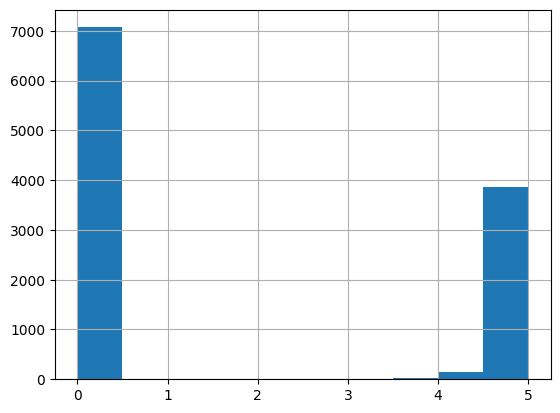

In [36]:
df.overall_satisfaction.hist()

In [22]:
df[['room_id', 'neighborhood', 'price', 'latitude', 'longitude']].head()

,room_id,neighborhood,price,latitude,longitude
0,3732200,Mooca,47.0,-23.560867,-46.605319
1,2247926,Pinheiros,21.0,-23.562833,-46.694440
2,2674673,Itaquera,311.0,-23.543185,-46.457264
3,2996011,Penha,389.0,-23.525000,-46.492178
4,2939182,Iguatemi,311.0,-23.624311,-46.414379


In [12]:
len(df.room_id.unique())

11118

In [33]:
df_grouped = df.groupby('neighborhood').agg({
    'latitude': 'mean',
    'longitude': 'mean',
    'room_id': 'count',
    'price': 'mean'
}).reset_index()

df_grouped.rename(columns={'room_id': 'num_rooms'}, inplace=True)

fig = px.scatter_mapbox(
    df_grouped,
    lat="latitude",
    lon="longitude",
    size="num_rooms",
    color="price",
    hover_name="neighborhood",
    size_max=50,
    zoom=10,
    mapbox_style="carto-positron",
)

fig.update_layout(
    height=600,
    width=800,
    margin={"r":0,"t":0,"l":0,"b":0}
)

fig.show()


In [25]:
import plotly.express as px

fig = px.density_mapbox(
    df,
    lat="latitude",
    lon="longitude",
    z="price",  
    radius=10,  
    center=dict(lat=-23.5505, lon=-46.6333), 
    zoom=10,
    hover_name="neighborhood",
    mapbox_style="carto-positron",
    height=600,
    width=800,
)

fig.update_layout(
    margin={"r":0,"t":0,"l":0,"b":0}
)
fig.show()

In [35]:
fig = px.density_mapbox(
    df,
    lat="latitude",
    lon="longitude",
    z="overall_satisfaction",  
    radius=10,  
    center=dict(lat=-23.5505, lon=-46.6333), 
    zoom=10,
    hover_name="neighborhood",
    mapbox_style="carto-positron",
    height=600,
    width=800,
)

fig.update_layout(
    margin={"r":0,"t":0,"l":0,"b":0}
)
fig.show()